In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pennylane import numpy as np
import jax
import jax.numpy as jnp
import pickle
from collections import defaultdict
from models.pennylane_models import *

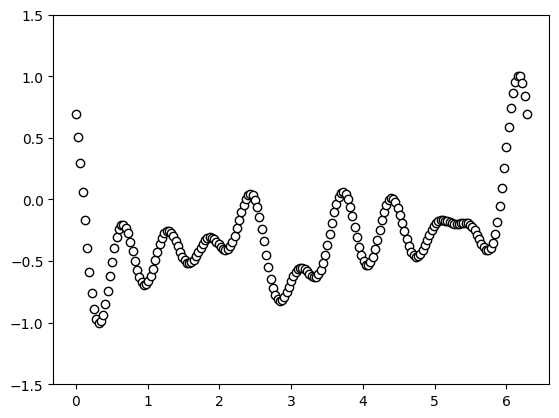

In [31]:
coeffs = [
    (1.29 + 1.13j),  # c_1
    (0.43 + 0.89j),  # c_2
    (1.97 + 1.03j),  # c_3
    (0.17 + 0.59j),  # c_4
    (1.71 + 1.41j),  # c_5
    (0.61 + 0.37j),  # c_6
    (1.19 + 1.67j),  # c_7
    (0.73 + 1.61j),  # c_8
    (0.23 + 0.47j),  # c_9
    (1.83 + 0.83j),  # c_10
]

c0 = 0.0
scaling = 1


def target_function(x):
    res = c0
    for idx, c in enumerate(coeffs):
        exponent = scaling * (idx + 1) * x * 1j
        conj_c = jnp.conjugate(c)
        res += c * jnp.exp(exponent) + conj_c * jnp.exp(-exponent)
    return jnp.real(res)


def minmax_scaler(y):
    # Scale y to [0, 1]
    y_min = jnp.min(y)
    y_max = jnp.max(y)
    y_scaled = (y - y_min) / (y_max - y_min)
    return y_scaled

x_raw = jnp.linspace(-12, 12, 200)
x = minmax_scaler(x_raw) * 2 * jnp.pi
target_y = jax.vmap(target_function)(x)

target_y_scaled = minmax_scaler(target_y) * 2 - 1

# plt.plot(x, target_y, c="black")
plt.scatter(x, target_y_scaled, facecolor="white", edgecolor="black")
plt.ylim(-1.5, 1.5)
plt.show()

In [32]:
'''
costs.append((cst, name, d, seed))
gradient_logger.append((logger.get_logs(), name, d, seed))
trained_weights.append((weights, name, d))
predictions_r2scores_models.append((predictions, r2, name, d, seed))
'''

seeds = [17, 23, 42, 73, 101, 137, 199, 241, 313, 409]

predictions_r2scores_basic_models = defaultdict(list)

predictions_r2scores_basic_controlled_models = {}
predictions_r2scores_basic_ising_models = {}
costs_basic_models = {}
gradients_basic_models = {}

predictions_r2scores_exp_models = {}
costs_exp_models = {}
gradients_exp_models = {}

for s in seeds:
    with open(f"preds_and_r2/controlled_models/predictions_r2scores_standard_degree10_seed{s}", "rb") as f:
        predictions_r2scores_basic_controlled_models[s] = pickle.load(f)
    # with open(f"preds_and_r2/gradients_basic_degree10_seed{s}", "rb") as f:
    #     gradients_basic_models[s] = pickle.load(f)
    # with open(f"preds_and_r2/costs_basic_degree10_seed{s}", "rb") as f:
    #     costs_basic_models[s] = pickle.load(f)

    with open(f"preds_and_r2/ising_models/predictions_r2scores_standard_degree10_seed{s}", "rb") as f:
        predictions_r2scores_basic_ising_models[s] = pickle.load(f)

    # with open(f"preds_and_r2/controlled_models/predictions_r2scores_exponential_degree10_seed{s}", "rb") as f:
    #     predictions_r2scores_exp_models[s] = pickle.load(f)
    # with open(f"preds_and_r2/gradients_exp_degree10_seed{s}", "rb") as f:
    #     gradients_exp_models[s] = pickle.load(f)
    # with open(f"preds_and_r2/costs_exp_degree10_seed{s}", "rb") as f:
    #     costs_exp_models[s] = pickle.load(f)

idx = 0
for d in (predictions_r2scores_basic_controlled_models, predictions_r2scores_basic_ising_models):
    for key, value in d.items():
        predictions_r2scores_basic_models[key].extend(value)



In [33]:
# models = ["serial", "serial_2qubits", "strongly_parallel", "all_to_all_parallel", "all_to_all_crz", "all_to_all_rzz", "strongly_crz", "strongly_rzz"]

serial = defaultdict(list)
serial_crz = defaultdict(list)
serial_cry = defaultdict(list)
serial_crx_rz = defaultdict(list)
serial_crx_ry = defaultdict(list)
serial_ry_crx_rz = defaultdict(list)

basic_parallel = defaultdict(list)
basic_ry_rz_ry = defaultdict(list)
basic_rz_rx_rz = defaultdict(list)
basic_ry_rx_ry = defaultdict(list)
basic_ry_rx_rz = defaultdict(list)

strongly_parallel = defaultdict(list)
strongly_ry_rz_ry = defaultdict(list)
strongly_rz_rx_rz = defaultdict(list)
strongly_ry_rx_ry = defaultdict(list)
strongly_ry_rx_rz = defaultdict(list)

all_to_all_parallel = defaultdict(list)
all_to_all_ry_rz_ry = defaultdict(list)
all_to_all_rz_rx_rz = defaultdict(list)
all_to_all_ry_rx_ry = defaultdict(list)
all_to_all_ry_rx_rz = defaultdict(list)

basic_crz_models = defaultdict(list)
basic_cry_models = defaultdict(list)
basic_crx_rz_models = defaultdict(list)
basic_crx_ry_models = defaultdict(list)
basic_ry_crx_rz_models = defaultdict(list)

strongly_crz_models = defaultdict(list)
strongly_cry_models = defaultdict(list)
strongly_crx_rz_models = defaultdict(list)
strongly_crx_ry_models = defaultdict(list)
strongly_ry_crx_rz_models = defaultdict(list)

all_to_all_crz_models = defaultdict(list)
all_to_all_cry_models = defaultdict(list)
all_to_all_crx_rz_models = defaultdict(list)
all_to_all_crx_ry_models = defaultdict(list)
all_to_all_ry_crx_rz_models = defaultdict(list)

basic_rzz_models = defaultdict(list)
basic_ryy_models = defaultdict(list)
basic_rxx_rz_models = defaultdict(list)
basic_rxx_ry_models = defaultdict(list)
basic_ry_rxx_rz_models = defaultdict(list)

strongly_rzz_models = defaultdict(list)
strongly_ryy_models = defaultdict(list)
strongly_rxx_rz_models = defaultdict(list)
strongly_rxx_ry_models = defaultdict(list)
strongly_ry_rxx_rz_models = defaultdict(list)

all_to_all_rzz_models = defaultdict(list)
all_to_all_ryy_models = defaultdict(list)
all_to_all_rxx_rz_models = defaultdict(list)
all_to_all_rxx_ry_models = defaultdict(list)
all_to_all_ry_rxx_rz_models = defaultdict(list)

# change to exp if needed
for predictions_r2scores in predictions_r2scores_basic_models.values():
    for _, _, r2, _, name, d, _ in predictions_r2scores:
        match name:
            case "serial" | "serial_2qubits":
                serial[d].append(r2)
            case "serial_crz":
                serial_crz[d].append(r2)
            case "serial_cry":
                serial_cry[d].append(r2)
            case "serial_crx_rz":
                serial_crx_rz[d].append(r2)
            case "serial_crx_ry":
                serial_crx_ry[d].append(r2)
            case "serial_ry_crx_rz":
                serial_ry_crx_rz[d].append(r2)

            case "basic_parallel":
                basic_parallel[d].append(r2)
            case "basic_ry_rz_ry":
                basic_ry_rz_ry[d].append(r2)
            case "basic_rz_rx_rz":
                basic_rz_rx_rz[d].append(r2)
            case "basic_ry_rx_ry":
                basic_ry_rx_ry[d].append(r2)
            case "basic_ry_rx_rz":
                basic_ry_rx_rz[d].append(r2)

            case "strongly_parallel":
                strongly_parallel[d].append(r2)
            case "strongly_ry_rz_ry":
                strongly_ry_rz_ry[d].append(r2)
            case "strongly_rz_rx_rz":
                strongly_rz_rx_rz[d].append(r2)
            case "strongly_ry_rx_ry":
                strongly_ry_rx_ry[d].append(r2)
            case "strongly_ry_rx_rz":
                strongly_ry_rx_rz[d].append(r2)

            case "all_to_all_parallel":
                all_to_all_parallel[d].append(r2)
            case "all_to_all_ry_rz_ry":
                all_to_all_ry_rz_ry[d].append(r2)
            case "all_to_all_rz_rx_rz":
                all_to_all_rz_rx_rz[d].append(r2)
            case "all_to_all_ry_rx_ry":
                all_to_all_ry_rx_ry[d].append(r2)
            case "all_to_all_ry_rx_rz":
                all_to_all_ry_rx_rz[d].append(r2)

            case "basic_crz":
                basic_crz_models[d].append(r2)
            case "basic_cry":
                basic_cry_models[d].append(r2)
            case "basic_crx_rz":
                basic_crx_rz_models[d].append(r2)
            case "basic_crx_ry":
                basic_crx_ry_models[d].append(r2)
            case "basic_ry_crx_rz":
                basic_ry_crx_rz_models[d].append(r2)

            case "strongly_crz":
                strongly_crz_models[d].append(r2)
            case"strongly_cry":
                strongly_cry_models[d].append(r2)
            case "strongly_crx_rz":
                strongly_crx_rz_models[d].append(r2)
            case "strongly_crx_ry":
                strongly_crx_ry_models[d].append(r2)
            case "strongly_ry_crx_rz":
                strongly_ry_crx_rz_models[d].append(r2)

            case "all_to_all_crz":
                all_to_all_crz_models[d].append(r2)
            case "all_to_all_cry":
                all_to_all_cry_models[d].append(r2)
            case "all_to_all_crx_rz":
                all_to_all_crx_rz_models[d].append(r2)
            case "all_to_all_crx_ry":
                all_to_all_crx_ry_models[d].append(r2)
            case "all_to_all_ry_crx_rz":
                all_to_all_ry_crx_rz_models[d].append(r2)

            case "basic_rzz":
                basic_rzz_models[d].append(r2)
            case "basic_ryy":
                basic_ryy_models[d].append(r2)
            case "basic_rxx_rz":
                basic_rxx_rz_models[d].append(r2)
            case "basic_rxx_ry":
                basic_rxx_ry_models[d].append(r2)
            case "basic_ry_rxx_rz":
                basic_ry_rxx_rz_models[d].append(r2)

            case "strongly_rzz":
                strongly_rzz_models[d].append(r2)
            case "strongly_ryy":
                strongly_ryy_models[d].append(r2)
            case "strongly_rxx_rz":
                strongly_rxx_rz_models[d].append(r2)
            case "strongly_rxx_ry":
                strongly_rxx_ry_models[d].append(r2)
            case "strongly_ry_rxx_rz":
                strongly_ry_rxx_rz_models[d].append(r2)

            case "all_to_all_rzz":
                all_to_all_rzz_models[d].append(r2)
            case "all_to_all_ryy":
                all_to_all_ryy_models[d].append(r2)
            case "all_to_all_rxx_rz":
                all_to_all_rxx_rz_models[d].append(r2)
            case "all_to_all_rxx_ry":
                all_to_all_rxx_ry_models[d].append(r2)
            case "all_to_all_ry_rxx_rz":
                all_to_all_ry_rxx_rz_models[d].append(r2)


In [34]:
"""all together"""

models = {
    "serial": serial,
    "serial_crz": serial_crz,
    "serial_cry": serial_cry,
    "serial_crx_rz": serial_crx_rz,
    "serial_crx_ry": serial_crx_ry,
    "serial_ry_crx_rz": serial_ry_crx_rz,

    "basic_parallel": basic_parallel,
    "basic_ry_rz_ry": basic_ry_rz_ry,
    "basic_rz_rx_rz": basic_rz_rx_rz,
    "basic_ry_rx_ry": basic_ry_rx_ry,
    "basic_ry_rx_rz": basic_ry_rx_rz,

    "strongly_parallel": strongly_parallel,
    "strongly_ry_rz_ry": strongly_ry_rz_ry,
    "strongly_rz_rx_rz": strongly_rz_rx_rz,
    "strongly_ry_rx_ry": strongly_ry_rx_ry,
    "strongly_ry_rx_rz": strongly_ry_rx_rz,

    "all_to_all_parallel": all_to_all_parallel,
    "all_to_all_ry_rz_ry": all_to_all_ry_rz_ry,
    "all_to_all_rz_rx_rz": all_to_all_rz_rx_rz,
    "all_to_all_ry_rx_ry": all_to_all_ry_rx_ry,
    "all_to_all_ry_rx_rz": all_to_all_ry_rx_rz,

    "basic_ry_crz_ry": basic_crz_models,
    "basic_rz_cry_rz": basic_cry_models,
    "basic_rz_crx_rz": basic_crx_rz_models,
    "basic_ry_crx_ry": basic_crx_ry_models,
    "basic_ry_crx_rz": basic_ry_crx_rz_models,

    "strongly_ry_crz_ry": strongly_crz_models,
    "strongly_rz_cry_rz": strongly_cry_models,
    "strongly_rz_crx_rz": strongly_crx_rz_models,
    "strongly_ry_crx_ry": strongly_crx_ry_models,
    "strongly_ry_crx_rz": strongly_ry_crx_rz_models,

    "all_to_all_ry_crz_ry": all_to_all_crz_models,
    "all_to_all_rz_cry_rz": all_to_all_cry_models,
    "all_to_all_rz_crx_rz": all_to_all_crx_rz_models,
    "all_to_all_ry_crx_ry": all_to_all_crx_ry_models,
    "all_to_all_ry_crx_rz": all_to_all_ry_crx_rz_models,

    "basic_ry_rzz_ry": basic_rzz_models,
    "basic_rz_ryy_rz": basic_ryy_models,
    "basic_rz_rxx_rz": basic_rxx_rz_models,
    "basic_ry_rxx_ry": basic_rxx_ry_models,
    "basic_ry_rxx_rz": basic_ry_rxx_rz_models,

    "strongly_ry_rzz_ry": strongly_rzz_models,
    "strongly_rz_ryy_rz": strongly_ryy_models,
    "strongly_rz_rxx_rz": strongly_rxx_rz_models,
    "strongly_rz_rxx_ry": strongly_rxx_ry_models,
    "strongly_ry_rxx_rz": strongly_ry_rxx_rz_models,

    "all_to_all_ry_rzz_ry": all_to_all_rzz_models,
    "all_to_all_rz_ryy_rz": all_to_all_ryy_models,
    "all_to_all_rz_rxx_rz": all_to_all_rxx_rz_models,
    "all_to_all_ry_rxx_ry": all_to_all_rxx_ry_models,
    "all_to_all_ry_rxx_rz": all_to_all_ry_rxx_rz_models,
}

In [35]:
"""different rotations"""

serial_models = {
    "serial": serial,
    "serial_crz": serial_crz,
    "serial_cry": serial_cry,
    "serial_crx_rz": serial_crx_rz,
    "serial_crx_ry": serial_crx_ry,
    "serial_ry_crx_rz": serial_ry_crx_rz,
}

basic_parallel_models = {
    "basic_parallel": basic_parallel,
    "basic_ry_rz_ry": basic_ry_rz_ry,
    "basic_rz_rx_rz": basic_rz_rx_rz,
    "basic_ry_rx_ry": basic_ry_rx_ry,
    "basic_ry_rx_rz": basic_ry_rx_rz,
}

strongly_parallel_models = {
    "strongly_parallel": strongly_parallel,
    "strongly_ry_rz_ry": strongly_ry_rz_ry,
    "strongly_rz_rx_rz": strongly_rz_rx_rz,
    "strongly_ry_rx_ry": strongly_ry_rx_ry,
    "strongly_ry_rx_rz": strongly_ry_rx_rz,
}

all_to_all_parallel_models = {
    "all_to_all_parallel": all_to_all_parallel,
    "all_to_all_ry_rz_ry": all_to_all_ry_rz_ry,
    "all_to_all_rz_rx_rz": all_to_all_rz_rx_rz,
    "all_to_all_ry_rx_ry": all_to_all_ry_rx_ry,
    "all_to_all_ry_rx_rz": all_to_all_ry_rx_rz,
}

basic_controlled_models = {
    "basic_ry_crz_ry": basic_crz_models,
    "basic_rz_cry_rz": basic_cry_models,
    "basic_rz_crx_rz": basic_crx_rz_models,
    "basic_ry_crx_ry": basic_crx_ry_models,
    "basic_ry_crx_rz": basic_ry_crx_rz_models,
}

strongly_controlled_models = {
    "strongly_ry_crz_ry": strongly_crz_models,
    "strongly_rz_cry_rz": strongly_cry_models,
    "strongly_rz_crx_rz": strongly_crx_rz_models,
    "strongly_ry_crx_ry": strongly_crx_ry_models,
    "strongly_ry_crx_rz": strongly_ry_crx_rz_models,
}

all_to_all_controlled_models = {
    "all_to_all_ry_crz_ry": all_to_all_crz_models,
    "all_to_all_rz_cry_rz": all_to_all_cry_models,
    "all_to_all_rz_crx_rz": all_to_all_crx_rz_models,
    "all_to_all_ry_crx_ry": all_to_all_crx_ry_models,
    "all_to_all_ry_crx_rz": all_to_all_ry_crx_rz_models,
}

basic_ising_models = {
    "basic_ry_rzz_ry": basic_rzz_models,
    "basic_rz_ryy_rz": basic_ryy_models,
    "basic_rz_rxx_rz": basic_rxx_rz_models,
    "basic_ry_rxx_ry": basic_rxx_ry_models,
    "basic_ry_rxx_rz": basic_ry_rxx_rz_models,
}

strongly_ising_models = {
    "strongly_ry_rzz_ry": strongly_rzz_models,
    "strongly_rz_ryy_rz": strongly_ryy_models,
    "strongly_rz_rxx_rz": strongly_rxx_rz_models,
    "strongly_rz_rxx_ry": strongly_rxx_ry_models,
    "strongly_ry_rxx_rz": strongly_ry_rxx_rz_models,
}

all_to_all_ising_models = {
    "all_to_all_ry_rzz_ry": all_to_all_rzz_models,
    "all_to_all_rz_ryy_rz": all_to_all_ryy_models,
    "all_to_all_rz_rxx_rz": all_to_all_rxx_rz_models,
    "all_to_all_ry_rxx_ry": all_to_all_rxx_ry_models,
    "all_to_all_ry_rxx_rz": all_to_all_ry_rxx_rz_models,
}


In [36]:
"""different entangling strategies"""

parallel_models = {
    "basic_parallel": basic_parallel,
    "strongly_parallel": strongly_parallel,
    "all_to_all_parallel": all_to_all_parallel
}

controlled_models = {
    "basic_ry_crz_ry": basic_crz_models,
    "strongly_ry_crz_ry": strongly_crz_models,
    "all_to_all_ry_crz_ry": all_to_all_crz_models
}

ising_models = {
    "basic_ry_rzz_ry": basic_rzz_models,
    "strongly_ry_rzz_ry": strongly_rzz_models,
    "all_to_all_ry_rzz_ry": all_to_all_rzz_models
}

In [37]:
"""different entangling types"""

basic_y_z_y_models = {
    "basic_ry_rz_ry": basic_ry_rz_ry,
    "basic_ry_crz_ry": basic_crz_models,
    "basic_ry_rzz_ry": basic_rzz_models
}

basic_y_x_z_models = {
    "basic_ry_rx_rz": basic_ry_rx_rz,
    "basic_ry_crx_rz": basic_ry_crx_rz_models,
    "basic_ry_rxx_rz": basic_ry_rxx_rz_models
}

strongly_y_z_y_models = {
    "strongly_ry_rz_ry": strongly_ry_rz_ry,
    "strongly_ry_crz_ry": strongly_crz_models,
    "strongly_ry_rzz_ry": strongly_rzz_models
}

strongly_y_x_z_models = {
    "strongly_ry_rx_rz": strongly_ry_rx_rz,
    "strongly_ry_crx_rz": strongly_ry_crx_rz_models,
    "strongly_ry_rxx_rz": strongly_ry_rxx_rz_models
}

all_to_all_y_z_y_models = {
    "all_to_all_ry_rz_ry": all_to_all_ry_rz_ry,
    "all_to_all_ry_crz_ry": all_to_all_crz_models,
    "all_to_all_ry_rzz_ry": all_to_all_rzz_models
}

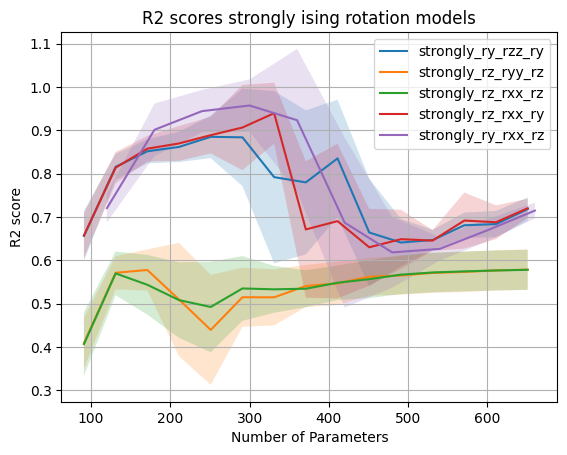

In [47]:
for name, model in strongly_ising_models.items():
    means = []
    stds = []
    params = []
    for d, scores in model.items():
        mean_r2 = np.mean(np.array(scores))
        std_r2 = np.std(np.array(scores))
        means.append(mean_r2)
        stds.append(std_r2)
        params.append(d)

    means = np.array(means)
    stds = np.array(stds)
    params = np.array(params)

    plt.plot(params, means, label=name)
    plt.fill_between(params, means - stds, means + stds, alpha=0.2)

plt.grid()
# plt.xlim(0, 140)
# plt.ylim(0.55, 1.02)
plt.xlabel("Number of Parameters")
plt.ylabel("R2 score")
plt.title("R2 scores strongly ising rotation models")
plt.legend()
plt.show()

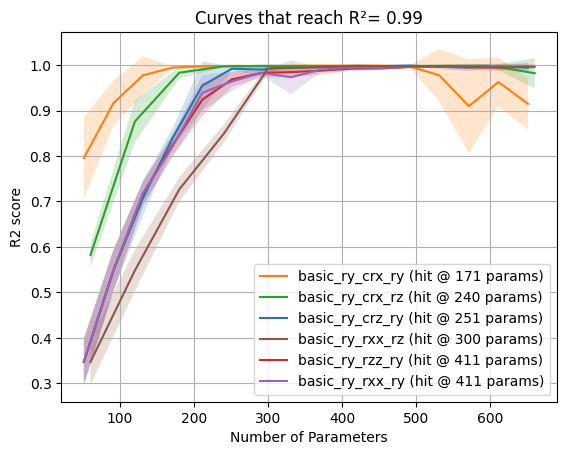

In [39]:
threshold = 0.99
tol = 0 #1e-6  # tolerance for floating-point comparisons

fig, ax = plt.subplots()
legend_items = []  # (handle, name, hit_param)

for name, model in models.items():
    means, stds, params = [], [], []
    for d, scores in model.items():
        s = np.array(scores)
        means.append(s.mean())
        stds.append(s.std())
        params.append(d)

    means  = np.array(means)
    stds   = np.array(stds)
    params = np.array(params)

    # sort by params for consistent plotting
    order = np.argsort(params)
    params, means, stds = params[order], means[order], stds[order]

    # find the smallest parameter value where mean hits ~1.0
    hit_mask = means >= (threshold - tol)
    if not np.any(hit_mask):
        continue  # skip curves that never reach 0.99

    hit_param = float(np.min(params[hit_mask]))

    (line,) = ax.plot(params, means, label=name)
    ax.fill_between(params, means - stds, means + stds, alpha=0.2)

    legend_items.append((line, name, hit_param))

ax.grid()
ax.set_xlabel("Number of Parameters")
ax.set_ylabel("R2 score")
ax.set_title(f"Curves that reach R²= {threshold}")

if legend_items:
    legend_items.sort(key=lambda t: t[2])  # ascending by earliest hit param
    handles = [h for h, _, _ in legend_items]
    labels  = [f"{n} (hit @ {p:g} params)" for _, n, p in legend_items]
    ax.legend(handles, labels)
else:
    ax.text(0.5, 0.5, "No curves reached R² ≈ 1.0", ha="center", va="center", transform=ax.transAxes)

plt.show()


In [40]:
def basic_ry_crx_rz(n_qubits, trainable_layers, scaling):
    dev = qml.device("default.qubit", wires=n_qubits)
    # num_wx = 2
    # layer_size = 3 * n_qubits
    # weights = jax.random.uniform(random_key1, shape=(num_wx, trainable_layers, layer_size), minval=0, maxval=2 * jnp.pi)

    def S(x):
        for w in range(n_qubits):
            qml.RX((scaling ** w) * x, wires=w)

    def W(theta):
        """
        train block
        RY -> CRX basic entangling layers -> RZ
        """
        idx = 0
        # RY to each qubit
        for i in range(n_qubits):
            qml.RY(theta[idx], wires=i)
            idx += 1

        # Ring of CRX
        for i in range(n_qubits):
            j = (i + 1) % n_qubits
            qml.CRX(theta[idx], wires=[i, j])
            idx += 1

        for i in range(n_qubits):
            qml.RZ(theta[idx], wires=i)
            idx += 1

    @qml.qnode(dev)
    def model(data, weights):

        for layer in range(trainable_layers):
            W(weights[0][layer])

        S(data)

        for layer in range(trainable_layers):
            W(weights[1][layer])

        return qml.expval(qml.PauliZ(0))

    return model, "basic_ry_crx_rz"

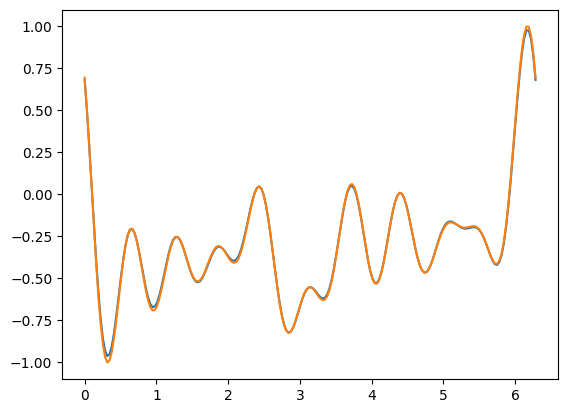

In [41]:
model, name = basic_ry_crx_rz(3, 3, 3)

with open(f"../trained_models/2nd_run/trained_weights_exponential_degree10_seed204", "rb") as f:
    all_trained_weights = pickle.load(f)

for w, n, d in all_trained_weights:
    if n == "basic_ry_crx_rz" and d == 54:
        trained_weights = w

def minmax_scaler(y):
    # Scale y to [0, 1]
    y_min = jnp.min(y)
    y_max = jnp.max(y)
    y_scaled = (y - y_min) / (y_max - y_min)
    return y_scaled

x_raw = jnp.linspace(-12, 12, 200)
x = minmax_scaler(x_raw) * 2 * jnp.pi

predictions = model(x, trained_weights)

plt.plot(x, predictions)
plt.plot(x, target_y_scaled)
plt.show()